In [ ]:
# a pre-trained version of our model is stored in this git directory
!git clone https://github.com/anushapant/IML-Model.git

Cloning into 'IML-Model'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
# our dataset is stored here
!git clone https://github.com/anushapant/Data-IML.git
!git clone https://github.com/anushapant/Face_mask_IML.git

Cloning into 'Data-IML'...
remote: Enumerating objects: 11630, done.
remote: Counting objects: 100% (11630/11630), done.
remote: Compressing objects: 100% (11630/11630), done.
remote: Total 11630 (delta 0), reused 11630 (delta 0), pack-reused 0
Receiving objects: 100% (11630/11630), 326.21 MiB | 38.63 MiB/s, done.
Checking out files: 100% (11792/11792), done.
Cloning into 'Face_mask_IML'...
remote: Enumerating objects: 2575, done.
remote: Total 2575 (delta 0), reused 0 (delta 0), pack-reused 2575
Receiving objects: 100% (2575/2575), 425.37 MiB | 43.09 MiB/s, done.
Resolving deltas: 100% (848/848), done.
Checking out files: 100% (2646/2646), done.


In [ ]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
model = load_model('IML-Model')

1

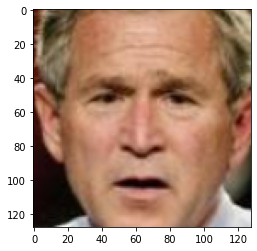

In [ ]:
# A single test image with no mask. As we can see, the result is 1, which indicates that there is no mask here

image1 = cv2.resize(cv2.imread('Data-IML/Test/WithoutMask/144.png'),(128,128))
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)) #This is in order to ensure that the image is displayed with the colrect colors.
# By default, the values are BGR instead of RGB, which is why a normal image appears to be displayed in a wrong manner with different colors if this is not done (as someone pointed out during our demo as well)

inpimg = (np.reshape(image1,[1,128,128,3]))/255.0 #Normalization
res = model.predict(inpimg)
np.argmax(res)

0

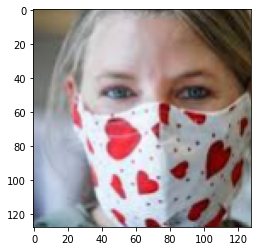

In [ ]:
# A single test image with a mask. As we can see, the result is 0, which indicates that there is a mask here

image2 = cv2.resize(cv2.imread('Data-IML/Test/WithMask/190.png'),(128,128))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

inpimg = (np.reshape(image2,[1,128,128,3]))/255.0 #Normalization
res = model.predict(inpimg)
np.argmax(res)

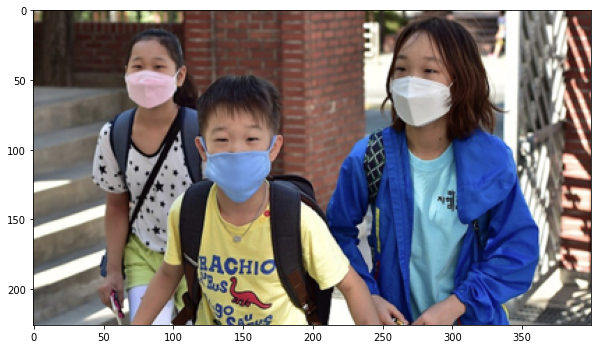

In [ ]:
# Based on Towards Data Science's page on Face detection using Opencv (https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81)
FD = cv2.CascadeClassifier('Face_mask_IML/haarcascade_frontalface_default.xml')
img = cv2.cvtColor(cv2.imread('Face_mask_IML/dataset/images/maksssksksss774.png'), cv2.IMREAD_GRAYSCALE)

faces = FD.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

output = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #correctly colored image
plt.figure(figsize=(10,10))
plt.imshow(output)

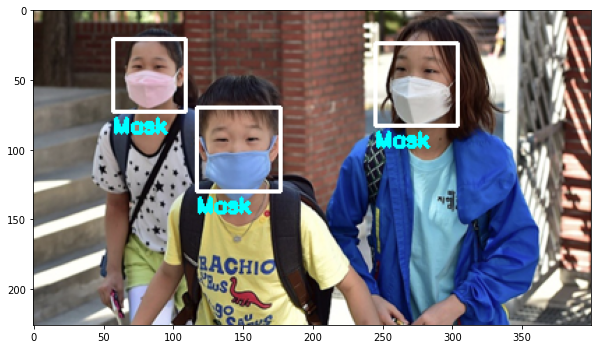

In [ ]:
#plotting
for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        inpimg = cv2.resize(output[y:y+h,x:x+w],(128,128))
        inpimg = np.reshape(inpimg,[1,128,128,3])/255.0
        res = model.predict(inpimg)
        res = np.argmax(res)
        label = "Mask"
        if res == 1: label = "No Mask"
        cv2.putText(output,label,(x, y+h+15),0,0.5,(0, 255, 255) ,2)
        cv2.rectangle(output,(x,y),(x+w,y+h),(255, 255, 255),2)

plt.figure(figsize=(10,10))
plt.imshow(output)

In [ ]:
actual_labels = []
predicted_labels = []

import os

for root, dirs, images in os.walk('Data-IML/Test/WithMask'):
    for img in images:
        actual_labels.append(0)
        inpImg = cv2.resize(cv2.imread(f'Data-IML/Test/WithMask/{img}'),(128,128))
        inpImg = (np.reshape(inpImg,[1,128,128,3]))/255.0
        res = model.predict(inpImg)
        predicted_labels.append(np.argmax(res))   

for root, dirs, images in os.walk('Data-IML/Test/WithoutMask'):
    for img in images:
        actual_labels.append(1)
        inpImg = cv2.resize(cv2.imread(f'Data-IML/Test/WithoutMask/{img}'),(128,128))
        inpImg = (np.reshape(inpImg,[1,128,128,3]))/255.0
        res = model.predict(inpImg)
        predicted_labels.append(np.argmax(res))   

In [ ]:
# Confusion matrix
conf = confusion_matrix(actual_labels, predicted_labels)
print(conf)

[[475   8]
 [  3 506]]
